# Assessed Task 2

# 1 Multivariate Predictive Model

## 1.1 Data

Here, you are requested to use the `numeric_cars` data in Assessed Task 1. 

Load the CSV data as `numeric_cars`.

In [0]:
import pandas as pd
import numpy as np
numeric_cars = pd.read_csv('numeric_cars.csv')
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## 1.2 Univariate Model using KNeighborsRegressor with Different k Values

**Q1**: Extended to various k values [1,3,5,7,9]. The other setting is the same as **Q8** in Assessed Task 1.  
Note: 
* Use `random.seed(1)` to make sure you get the same result after each test run;
* Draw a figure with the x-axis representing the different k values in KNeighborsRegressor and y-axis representing RMSE on test set. In this figure, each feature will have a corresponding line;
* Label each line with the name of the related feature.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from collections import OrderedDict

k_values = [1,3,5,7,9]

train_cols = numeric_cars.columns.drop('price')
train_cols

X = pd.DataFrame(numeric_cars[train_cols])        
y = pd.DataFrame(numeric_cars['price'])
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state=1)

rmse_results = pd.DataFrame(numeric_cars, columns=train_cols,index=[0])

for K,i in zip(k_values,[0,1,2,3,4]):
  for column in X_test:
    model = KNeighborsRegressor(n_neighbors = K).fit(X_train[[column]], y_train) 
    rmse_results.loc[i,column] = np.sqrt(mean_squared_error(y_test,model.predict(X_test[[column]])))

The different k values are saved in an array, divide it into testing and training set accordingly. Nested for loop is used to iterate through the columns for each *K* value and fit th regressor for each column, while *i* is used to give ordered row numbers for rmse_results.

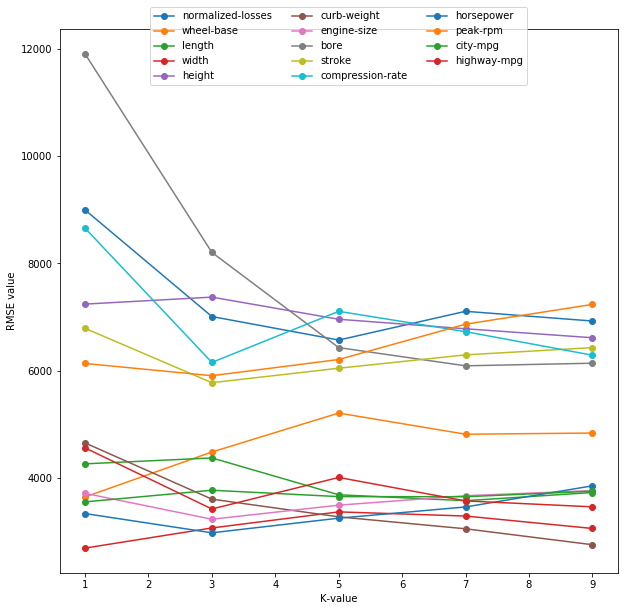

In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for column in X_test:
  plt.plot(k_values, rmse_results[column], marker='o')

plt.legend(numeric_cars.columns, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.xlabel('K-value')
plt.ylabel('RMSE value')
plt.show()

*matplotlib.pyplot* is used to create a plot with x axis being the K array and y-axis itreating through rmse_values. The legends, labels are mentioned as needed.


**Q2**: Compute average RMSE across different `k` values for each feature and report the results under an ascending order (RMSE) with the following format:  
`horsepower    8000.0000`   
`highway-mpg   9000.0000`

In [0]:
rmse_avg = rmse_results.mean()
rmse_avg = OrderedDict(sorted(rmse_avg.items(), key=lambda t: t[1]))
for column in rmse_avg:
  print("{} {:.4f}".format(column,rmse_avg[column]))

width 3096.0184
horsepower 3375.9723
curb-weight 3468.7891
engine-size 3574.6184
city-mpg 3676.5698
highway-mpg 3805.6210
length 3926.0101
wheel-base 4598.6687
stroke 6267.0144
peak-rpm 6469.8800
compression-rate 6986.2081
height 6992.8613
normalized-losses 7321.4288
bore 7753.4281


the avergage of each column in rmse_results is stored in rmse_avg and also ordered in aasceinding order of their average rmse values. Here OrderedDict is used to sort the values in the dictionary.

## 1.3 Multivariate Model using KNeighborsRegressor with Fixed k Value

**Q3**: Training the KNeighborsRegressor model with different numbers of best feature sets.  
Note: 
* Randomize order of rows in data frame with `random.seed(1)` before splitting data into training and test set.
* The first 80% of the data are used as training set and the rest 20% are as test set.
* Fit a KNN model using k=5.
* Do the experiment five times with different feature sets as data (two best features, three best features, four best features, five best features, six best features). The feature ranking is based on the average RMSE value in **Q2** (Lower values indicate better features).
* Report the rmse_results (RMSE) on test set with the following format (5 is the k value):    
{'two best features': {5: 0000.00000},  
 'three best features': {5: 0000.00000},  
 'four best features': {5: 0000.00000},  
 'five best features': {5: 0000.00000},  
 'six best features': {5: 0000.00000}}  

In [0]:
X = pd.DataFrame(numeric_cars[train_cols])        
y = pd.DataFrame(numeric_cars['price'])
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state=1)

rmse_avg = pd.DataFrame(rmse_avg, index=[0])

rmse_fixed ={'two best features': {5: 0000.00000},
'three best features': {5: 0000.00000},
'four best features': {5: 0000.00000},
'five best features': {5: 0000.00000},
'six best features': {5: 0000.00000}}

rmse_fixed = pd.DataFrame.from_dict(OrderedDict(rmse_fixed))

for i in range(2,7):
  reg = KNeighborsRegressor(n_neighbors = 5).fit(X_train[rmse_avg.columns[0:i]],y_train)
  rmse_fixed.iloc[0,i-2] = np.sqrt(mean_squared_error(y_test,reg.predict(X_test[rmse_avg.columns[0:i]])))

rmse_fixed.to_dict(into=OrderedDict)

OrderedDict([('two best features', OrderedDict([(5, 2507.729018308855)])),
             ('three best features', OrderedDict([(5, 2313.967622093611)])),
             ('four best features', OrderedDict([(5, 2242.5972077253555)])),
             ('five best features', OrderedDict([(5, 2155.545008327784)])),
             ('six best features', OrderedDict([(5, 2388.040463562072)]))])

the data is split accordingly into training and testing set and *rmse_fixed* is declared as a dictionary that holds a best feature rmse value for each combination. 
The *i *value is used to iterate through *rmse_avg* for the best features (ie. first loop select first 2, second loop first 3 columns, etc.). 
Same as before the model is fitted, predicted values are sent to "mean_square_error" and later square rooted to update *rmse_fixed*

## 1.4 Multivariate Model using KNeighborsRegressor with Different k Values

#### Q4: We extend Q3 to various k values [1,2,...,25]. The other setting is the same as **Q3**. Draw a figure with the x-axis representing the different k values in KNeighborsRegressor and y-axis representing RMSE on test set. In this figure, each best feature set will have a corresponding line with labels.

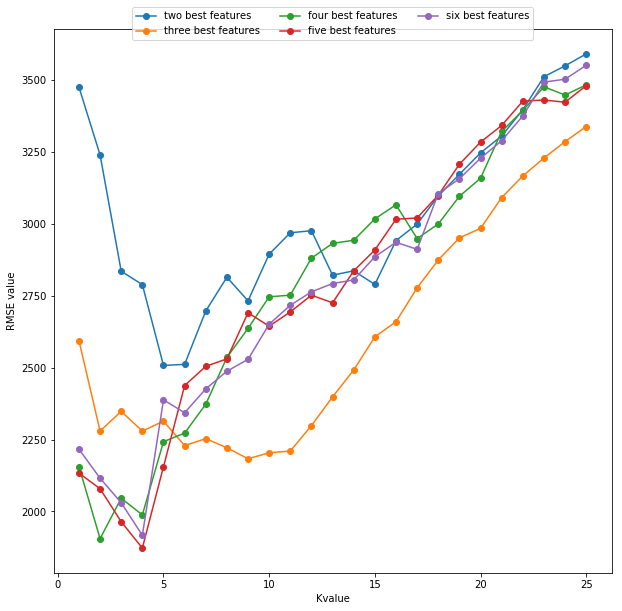

In [0]:
rmse_diff = pd.DataFrame(rmse_fixed, index=range(25))

for k in range(1,26):
  for i in range(2,7):
    reg = KNeighborsRegressor(n_neighbors = k).fit(X_train[rmse_avg.columns[0:i]],y_train)
    rmse_diff.iloc[k-1,i-2] = np.sqrt(mean_squared_error(y_test,reg.predict(X_test[rmse_avg.columns[0:i]])))
    
plt.figure(figsize = (10,10))
for column in rmse_diff:
  plt.plot(range(1,26), rmse_diff[column], marker='o')

plt.legend(rmse_diff.columns, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.xlabel('Kvalue')
plt.ylabel('RMSE value')
plt.show()

We repeat the same code as before except we iterate through different k values while also updating the *.iloc* row numbers for rmse_diff, new dataframe that saves 25 rows of rmse values for each feature combination for each k value. Therefore plotting the graph with these k values with each column in rmse_diff we get what's required.

## 1.5 Ridge Regression

Regularization is designed to penalize model complexity, therefore the higher the alpha, the less complex the model, decreasing the error due to variance (overfit). Alphas that are too high on the other hand increase the error due to bias (underfit). It is important, therefore to choose an optimal alpha such that the error is minimized in both directions.

**Q5**: Training the Ridge Regression model with the optimal alpha value.  
Note: 
* Randomize order of rows in data frame `numeric_cars` before splitting data into training and test set (random seed is set to 1);
* The first 80% of the data are used as training set and the rest 20% are as test set;
* Use [RidgeCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) with `10 cross-validation` to select the best alpha value using the training set;
* `alphas = np.logspace(-10, 1, 10)`;
* Report the rmse_result (RMSE) on test set using `Ridge` with the best alpha value.   

In [0]:
from sklearn.linear_model import RidgeCV,Ridge

X = pd.DataFrame(numeric_cars[train_cols])        
y = pd.DataFrame(numeric_cars['price'])
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state=1)

ridge_cv = RidgeCV(alphas = np.logspace(-10, 1, 10), cv=10).fit(X_train, y_train)
ridge = Ridge(alpha = ridge_cv.alpha_).fit(X_train, y_train)

rmse_results_ridge = np.sqrt(mean_squared_error(y_test, ridge.predict(X_test)))
rmse_results_ridge

3285.5877340369807

The data is splot as usual into training and testing sets. RidgeCV is used to select the best alpha by first training the model with *alphas*. We later pass *.alphas_* into Ridge to give us the rmse value for the best alpha after fitting nd predicting the datasets.

## 1.6 Lasso Regression

###  Data

In [0]:
data = pd.read_csv("data.csv",index_col=0)
print(data.shape)
data.head()

(215, 101)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Label
1,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
2,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
3,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
4,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
5,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


In [0]:
train = data.iloc[:172,]
test = data.iloc[173:,]

xtrain = train.iloc[:,:100]
ytrain = pd.DataFrame(train.iloc[:,100])
xtest = test.iloc[:,:100]
ytest = pd.DataFrame(test.iloc[:,100])

Explicitly define each of the training and testing sets.

**Q6**: Analysis of the $R^2$ on a grid of alphas.  
Note: 
* The model lasso here is built with `random_state=0`, `max_iter=10000`,and `tol=0.01`;
* Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) with `3 cross-validation`;
* `alphas = np.logspace(-3, -1, 30)`;
* Draw a figure with the x-axis representing the different alphas and the y-axis representing CV score on training set.

(0.001, 0.1)

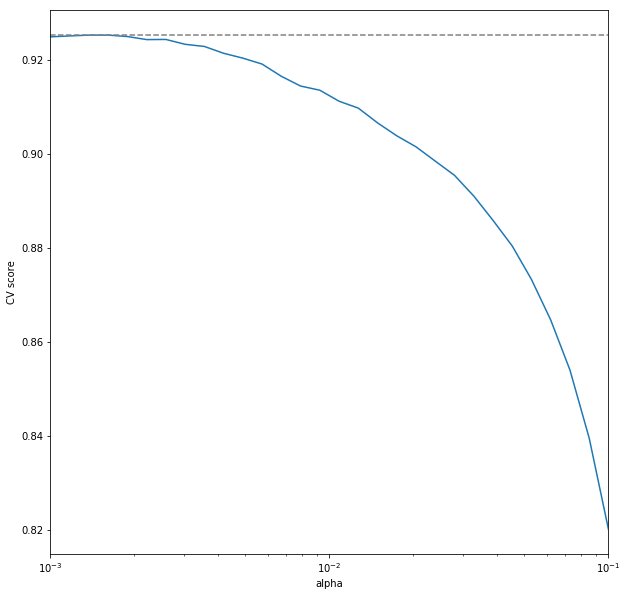

In [0]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso(max_iter=10000, tol=0.01, random_state=0).fit(xtrain, ytrain)
alphas = np.logspace(-3, -1, 30)
param = [{'alpha': alphas}]
clf = GridSearchCV(lasso, param, cv=3).fit(xtrain, ytrain)

scores = clf.cv_results_['mean_test_score']

plt.figure(figsize = (10,10))
plt.semilogx(alphas, scores)
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.xlim([alphas[0], alphas[-1]])



Import *Lasso* and *GridSearchCV*, fit the lasso model with required parameters. Later "lasso" and "param" (which holds array of a dictionary of alpha values) and sent as parameters to *GridSearchCV* to give  out the required CV score which is present in *.cv_results_*.
The figure is plotted using the .semilogx function since alphas values are mentioned in terms of log and at the same time a dotted horizontal line is plotted that represents the maximium CV score present in the model.

**Q7**: Report the coefficients in the Lasso when `alpha = 0.01`.  
Note: 
* The model lasso here is built with `random_state=0` and `max_iter=10000`;
* Make a bar plot with the x-axis representing the No. of features, `np.arange(0,100)` [*e.g.,* 0 represents V1 and 99 represents V100], and y-axis representing the value of the coefficient.

Number of features used: 17


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Text(0.5, 0, 'Features')

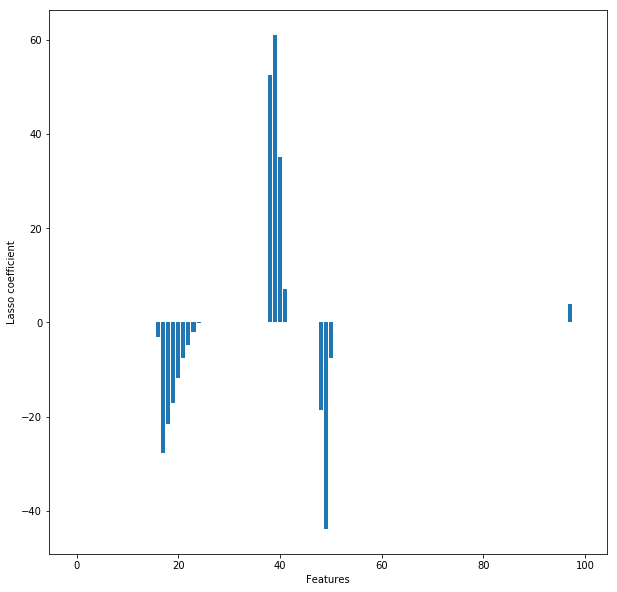

In [17]:
lasso = Lasso(alpha = 0.01, max_iter=10000, random_state=0).fit(xtrain, ytrain)
print("Number of features used:", np.sum(lasso.coef_ != 0))
plt.figure(figsize=(10,10))
plt.bar(np.arange(0,100),lasso.coef_)
plt.ylabel('Lasso coefficient')
plt.xlabel('Features')

Fit a lasso model with the required arguments as mentioned, here we use lasso.coef_ to  get the coefficient values which in turn lets us know what features are being used. 
Use plt.bar to plot a bar graph and lable them as needed.

**Q8**: Report the coefficient traces as alpha changes.  
Note: 
* The model lasso here is built with `random_state=0` and `max_iter=10000`;
* `alphas = np.logspace(-3, -1, 30)`;
* Draw a figure with the x-axis representing the different alphas and y-axis representing coefficients (each feature will have a corresponding line).

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

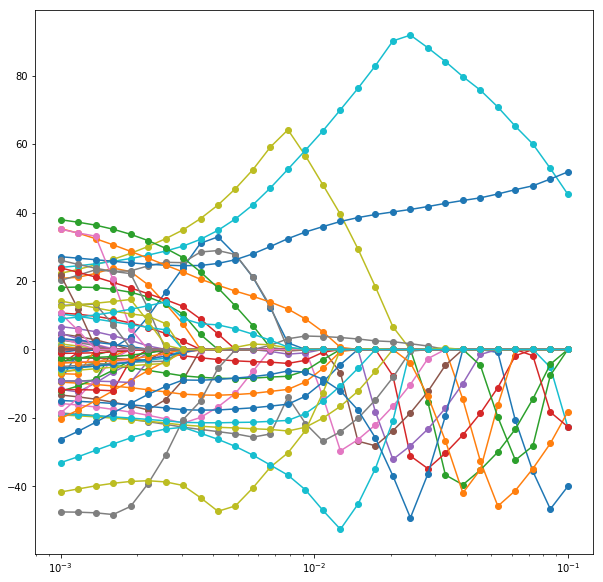

In [16]:
alphas = np.logspace(-3, -1, 30)
coef = pd.DataFrame(xtrain, index=range(0,30))

for a,i in zip(alphas,range(0,30)):
    lasso = Lasso(alpha = a, max_iter=10000, random_state=0).fit(xtrain, ytrain)
    coef.iloc[i] = lasso.coef_
    
plt.figure(figsize=(10,10))
for column in xtrain:
  plt.semilogx(alphas, coef[column], marker='o')
plt.show()  

Since lasso cannot take multiple alpha values at once, we can loop it for each alpha value and fit the model with the required arguments as mentioned. Coefficient for each alpha value is saved in coef as a dataframe.
Later plot the graph using .semilogx with alphas and each column/feature of coef as the two axes. 